In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

In [2]:

# Load data sets form UCI repository
adult = fetch_ucirepo(id=2)
iris = fetch_ucirepo(id=53)
wine = fetch_ucirepo(id=109)
breast_cancer = fetch_ucirepo(id=14)
digits = fetch_ucirepo(id=81)
heart_disease = fetch_ucirepo(id=45)
automobile = fetch_ucirepo(id=10)
car_evaluation = fetch_ucirepo(id=19)
credit_approval = fetch_ucirepo(id=27)
glass_identification = fetch_ucirepo(id=42)   
mushroom = fetch_ucirepo(id=73)
spambase = fetch_ucirepo(id=94)
forest_fires = fetch_ucirepo(id=162)
wine_quality = fetch_ucirepo(id=186)
bank_marketing = fetch_ucirepo(id=222)
default_of_credit_card_clients = fetch_ucirepo(id=350)
online_retail = fetch_ucirepo(id=352)
real_estate_valuation = fetch_ucirepo(id=477)
heart_failure_clinical_records = fetch_ucirepo(id=519)
dry_bean = fetch_ucirepo(id=602)
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)
statlog_german_credit_data = fetch_ucirepo(id=144)


# student_performance, online_retail, abalone,
# 'student_performance', air_quality, 'abalone' ,
#data_list = [iris, heart_disease, diabetes, glass]
data_list = [iris, wine, breast_cancer, digits, wine_quality, heart_disease, 
             adult, bank_marketing, car_evaluation,  automobile, mushroom, 
             default_of_credit_card_clients, spambase, heart_failure_clinical_records,  
             glass_identification,dry_bean ,breast_cancer_wisconsin_diagnostic, 
             predict_students_dropout_and_academic_success, 
             estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition, 
             statlog_german_credit_data]

data_names = ['iris', 'wine', 'breast_cancer', 'digits', 'wine_quality', 
              'heart_disease', 'adult', 'bank_marketing', 'car_evaluation', 'automobile', 
              'mushroom', 'default_of_credit_card_clients', 'spambase', 
              'heart_failure_clinical_records',  'glass_identification','dry_bean', 
              'breast_cancer_wisconsin_diagnostic', 'predict_students_dropout_and_academic_success', 
              'estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition', 
              'statlog_german_credit_data']



In [6]:
# Function to preprocess the data
def preprocess_data(X):
    # Identify categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        # Apply OneHotEncoder to categorical features
        ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
        X = ct.fit_transform(X)
    return X

In [19]:
#knn classifier
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

avrege_accuracy = 0
i = 0
for data_set in data_list:
    X = data_set.data.features
    y = data_set.data.targets

    # Preprocess the data
    X = preprocess_data(X)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Ensure y is a 1D array
    y = np.ravel(y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardization
    scaler = StandardScaler(with_mean=False)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the KNN classifier
    classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
    classifier.fit(X_train, y_train)
    
    #classifier = HistGradientBoostingClassifier(random_state=42, max_iter=100, learning_rate=0.1, max_depth=None)
    #classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier and get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')
    
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=3)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

    print(" ")
    i += 1
    avrege_accuracy += accuracy
    
print(f'Average accuracy: {avrege_accuracy/data_list.__len__():.2f}')


Dataset: iris
Accuracy: 0.93
Cross-validation scores: [0.98 0.98 0.98]
Mean cross-validation score: 0.98
 
Dataset: wine
Accuracy: 0.97
Cross-validation scores: [0.61666667 0.61016949 0.76271186]
Mean cross-validation score: 0.66
 
Dataset: breast_cancer
Accuracy: 0.72
Cross-validation scores: [0.72916667 0.73684211 0.68421053]
Mean cross-validation score: 0.72
 
Dataset: digits
Accuracy: 0.99
Cross-validation scores: [0.99017467 0.9893559  0.97734716]
Mean cross-validation score: 0.99
 
Dataset: wine_quality
Accuracy: 0.56
Cross-validation scores: [0.36749769 0.38504155 0.39676674]
Mean cross-validation score: 0.38
 
Dataset: heart_disease
Accuracy: 0.52
Cross-validation scores: [0.4950495  0.51485149 0.4950495 ]
Mean cross-validation score: 0.50
 
Dataset: adult
Accuracy: 0.52
Cross-validation scores: [0.47153123 0.47669062 0.47555283]
Mean cross-validation score: 0.47
 
Dataset: bank_marketing
Accuracy: 0.89
Cross-validation scores: [0.88501095 0.87378898 0.7711347 ]
Mean cross-vali

In [3]:
iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()
digits = datasets.load_digits()
wine_quality = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
heart_disease = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
glass = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)

In [4]:
data_list_unsupervised = [iris, wine, breast_cancer, digits, wine_quality, heart_disease, glass]
data_names_unsupervised = ['iris', 'wine', 'breast_cancer', 'digits', 'wine_quality', 'heart_disease', 'glass']

Silhouette Score: 0.4751434694267145
Cluster counts:
0    98
1    45
2     7
Name: count, dtype: int64


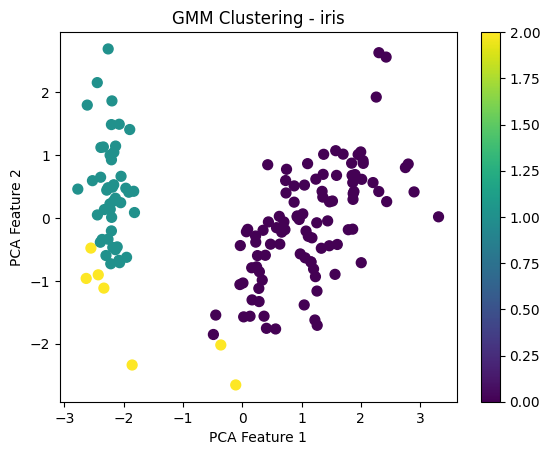

Silhouette Score: 0.2848589191898987
Cluster counts:
0    65
2    62
1    51
Name: count, dtype: int64


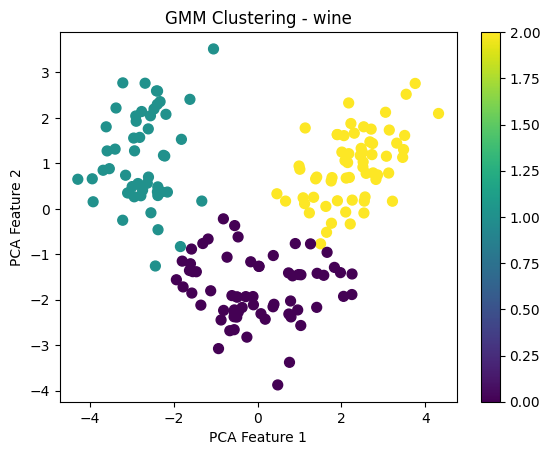

Silhouette Score: 0.2514991708517078
Cluster counts:
2    318
1    130
0    121
Name: count, dtype: int64


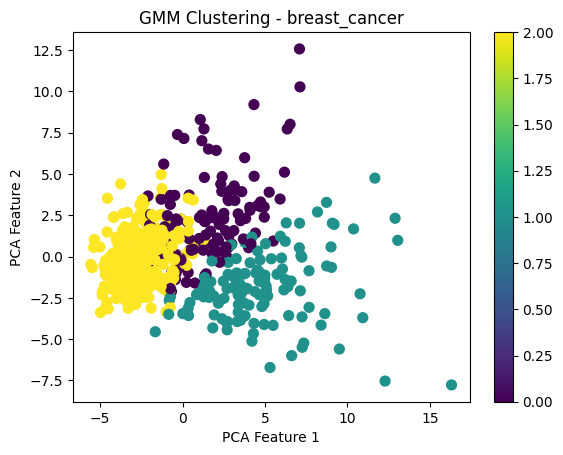

Silhouette Score: 0.11376145220361172
Cluster counts:
1    1312
2     448
0      37
Name: count, dtype: int64


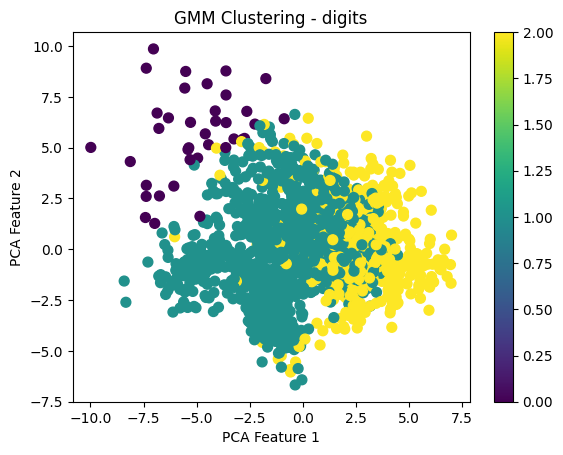

Silhouette Score: 0.18786322378942766
Cluster counts:
0    1075
1     348
2     176
Name: count, dtype: int64


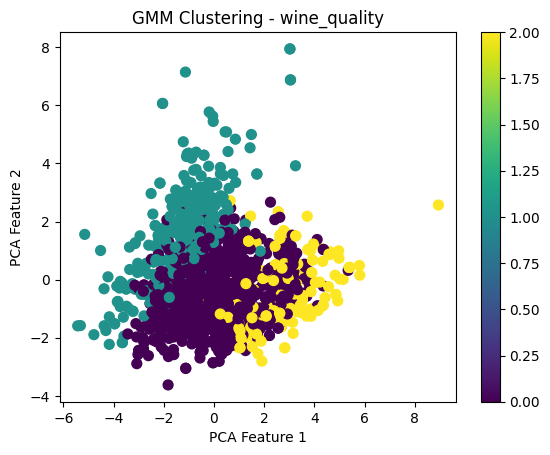

Silhouette Score: 0.15066326481303183
Cluster counts:
2    144
1    101
0     58
Name: count, dtype: int64


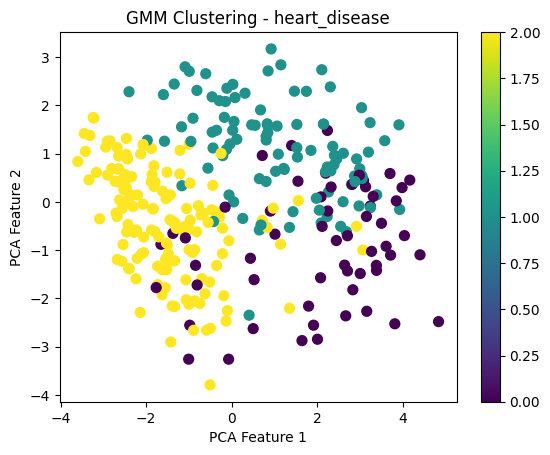

Silhouette Score: 0.3460578027633985
Cluster counts:
2    140
0     42
1     32
Name: count, dtype: int64


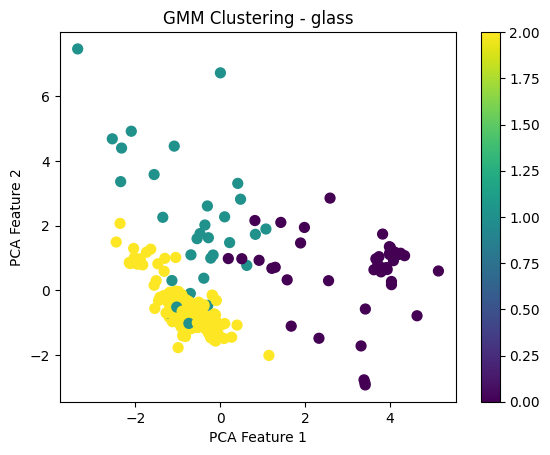

In [20]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score



# Iterate over the datasets
for i, data in enumerate(data_list_unsupervised):
    if data_names_unsupervised[i] == 'wine_quality':
        X = data.drop('quality', axis=1)
        y_true = data['quality']
    elif data_names_unsupervised[i] == 'heart_disease':
        X = data.iloc[:, :-1]
        y_true = data.iloc[:, -1]
    elif data_names_unsupervised[i] == 'glass':
        X = data.iloc[:, 1:-1]
        y_true = data.iloc[:, -1]
    else:
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y_true = pd.Series(data.target)

    # Preprocess the data
    X = preprocess_data(X)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Ensure y_true is a 1D array
    y_true = np.ravel(y_true)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)  
    X_pca = pca.fit_transform(X_scaled)
    
    
    # Step 3: Apply Gaussian Mixture Model
    # Choose the number of components (clusters)
    n_components = 3  # Adjust based on your understanding of the dataset
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    
    # Predict cluster labels
    clusters = gmm.predict(X_scaled)
    
    
    # Calculate silhouette score
    if len(set(clusters)) > 1:
        score = silhouette_score(X_scaled, clusters)
        print(f"Silhouette Score: {score}")
    else:
        print("Silhouette Score cannot be calculated due to insufficient clusters.")

    # Print the cluster counts
    cluster_counts = pd.Series(clusters).value_counts()
    print("Cluster counts:")
    print(cluster_counts)
    
    # Scatter plot for visualization
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f"GMM Clustering - {data_names_unsupervised[i]}")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.colorbar()
    plt.show()
    
